In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd



# Loading reddit dataset

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/reddit data/data/reddit_output0.csv')
df2 = pd.read_csv('/content/drive/MyDrive/reddit data/data/redditoutput2.csv')
df3 = pd.read_csv('/content/drive/MyDrive/reddit data/data/reddit_output_3.csv')
df4 = pd.read_csv('/content/drive/MyDrive/reddit data/data/reddit_output4.csv')
df5 = pd.read_csv('/content/drive/MyDrive/reddit data/data/reddit_output_5.csv')
df6 = pd.read_csv('/content/drive/MyDrive/reddit data/data/reddit_output_8.csv')
df7 = pd.read_csv('/content/drive/MyDrive/reddit data/data/Data_Collection.csv')
df8 = pd.read_csv('/content/drive/MyDrive/reddit data/data/reddit_output_11.csv')
df9 = pd.read_csv('/content/drive/MyDrive/reddit data/data/reddit_output_12.csv')
df10 = pd.read_csv('/content/drive/MyDrive/reddit data/data/reddit_output_13.csv')
df11 = pd.read_csv('/content/drive/MyDrive/reddit data/data/reddit_output6.csv')
df12 = pd.read_csv('/content/drive/MyDrive/reddit data/data/unemployment (1).csv')




In [ ]:
combined_data = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], ignore_index=True)
combined_data.to_csv("/content/drive/MyDrive/reddit data/combined_reddit_data", index = False)

#Basic EDA: checking for nulls and demoving suplicates

In [ ]:

combined_data.head()

,MsgID,Timestamp,Author,ThreadID,ThreadTitle,MsgBody,ReplyTo,Permalink
0,jd0a6bw,3/20/23 22:11,loophoff,11wfk7q,As wealth inequality spirals out of control ma...,1) Authors don’t write their own titles,jcxqqy6,/r/Economics/comments/11wfk7q/as_wealth_inequa...
1,jd0ab6f,3/20/23 22:12,Marquis77,11wufxg,The Decade in Which Everything Was Great But F...,>More tax the rich? Please... Yes. Indeed. **...,jd049xb,/r/Economics/comments/11wufxg/the_decade_in_wh...
2,jd0ahz0,3/20/23 22:13,anotherusercolin,11wgwz8,Fed poised to approve quarter-point rate hike ...,Appropriate message from the shrike,jcyelim,/r/Economics/comments/11wgwz8/fed_poised_to_ap...
3,jd0alsn,3/20/23 22:14,CEOofracismandgov2,11w8p8m,The Federal Reserve must choose between inflat...,You have zero clue how this type of financial ...,jcx9wxb,/r/Economics/comments/11w8p8m/the_federal_rese...
4,jd0aq52,3/20/23 22:15,RedCascadian,11wmeay,Amazon announces 9000 job cuts in the face of ...,Yup. They used to tell people there was algori...,jd08ucy,/r/Economics/comments/11wmeay/amazon_announces...


In [ ]:
combined_data.shape

(14198, 8)

In [ ]:
null_count = combined_data.isnull().sum()
null_count



MsgID            0
Timestamp        0
Author         284
ThreadID         0
ThreadTitle      0
MsgBody          0
ReplyTo          0
Permalink        0
dtype: int64

In [ ]:
combined_data = combined_data.dropna()


In [ ]:
duplicate_counts = combined_data.duplicated().sum()
print(duplicate_counts)

3004


In [ ]:
combined_data = combined_data.drop_duplicates()

In [ ]:
null_count = combined_data.isnull().sum()
null_count

MsgID          0
Timestamp      0
Author         0
ThreadID       0
ThreadTitle    0
MsgBody        0
ReplyTo        0
Permalink      0
dtype: int64

In [ ]:
# Create a new column containing the length each headline text
combined_data["MsgBody_len"] = combined_data["MsgBody"].apply(lambda x : len(x.split()))

#Checking the legnth of comments and visualizing

In [ ]:
data_text = combined_data[['MsgBody']];

In [ ]:
print("The longest Comment has: {} words".format(combined_data.MsgBody_len.max()))

The longest Comment has: 973 words


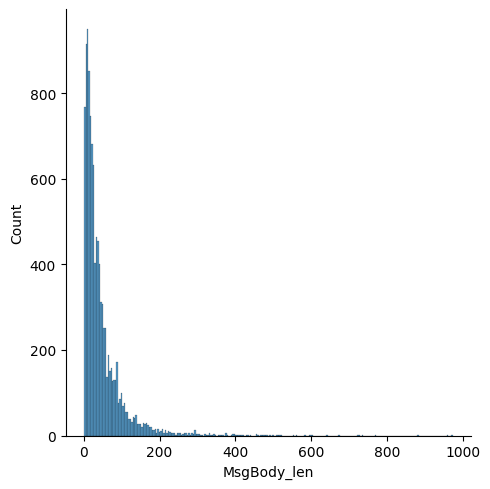

In [ ]:
# Visualize the length distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(combined_data.MsgBody_len, kde=False)

## Topic Modeling using BERT

# Topic Modeling



In [ ]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 85.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 79.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   

In [ ]:
%%time
from bertopic import BERTopic
combined_data = combined_data.reset_index(drop=True)
model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size= 7)
comment_topics, _ = model.fit_transform(combined_data.MsgBody)


Batches:   0%|          | 0/444 [00:00<?, ?it/s]

2023-05-01 03:05:06,111 - BERTopic - Transformed documents to Embeddings
2023-05-01 03:05:43,207 - BERTopic - Reduced dimensionality
2023-05-01 03:05:44,250 - BERTopic - Clustered reduced embeddings


CPU times: user 1min 2s, sys: 1.91 s, total: 1min 3s
Wall time: 1min 5s


In [ ]:
from umap import UMAP

In [ ]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)
# Initiate BERTopic
model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
comment_topics, probabilities = model.fit_transform(combined_data.MsgBody)

2023-05-01 03:06:10,666 - BERTopic - Transformed documents to Embeddings
2023-05-01 03:06:26,608 - BERTopic - Reduced dimensionality
2023-05-01 03:07:24,623 - BERTopic - Clustered reduced embeddings


# Topic Extraction and Representation

In [ ]:
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq.head()
# displaying the first 5 topics.
# -1 topic is garbage

Number of topics: 303


,Topic,Count,Name
0,-1,5864,-1_and_the_of_to
1,0,184,0_claim_unemployment_week_benefits
2,1,164,1_degree_degrees_college_masters
3,2,131,2_banks_banking_bank_regulators
4,3,124,3_amazon_aws_amazons_cloud


In [ ]:
a_topic = freq.iloc[3]["Topic"] # Select the ndt topic
model.get_topic(a_topic) # Show the words and their c-TF-IDF scores

[('recession', 0.03243817472215237),
 ('will', 0.010726275403372171),
 ('collapse', 0.009119962558323669),
 ('recessions', 0.008129344275169202),
 ('the', 0.007716089405741648),
 ('2008', 0.007701850863777222),
 ('we', 0.007127361972289672),
 ('market', 0.006814952791043405),
 ('crisis', 0.006695456859663661),
 ('of', 0.0066231873375955175)]

##Topics Visualization.


## Topic Terms
The most relevant words of each topic can be visualized in a form of barchart out of the c-TF-IDF score, which is interesting to visually compare topics. Below is the corresponding visualization for the topic 15 topics.

In [ ]:
model.visualize_barchart(top_n_topics=15)

# Intertopic Distance Map

In [ ]:
model.visualize_topics(top_n_topics=15)

##Visualize Topic Hierarchy
Visualization helps to understand how they relate to one another.

In [ ]:
model.visualize_hierarchy(top_n_topics=30)

By looking at the first level (level 0) of the dendogram, we can see that topics with the same colors have been grouped together.

All these information can help the user better understand the reason why the topics have been considered to be similar one to another.

## Topic Similarities

In [ ]:
# Select most 5 similar topics
similar_topics, similarity = model.find_topics("layoff", top_n = 5)

similar_topics contains the topics index from most similar to least similar.
similarity contains the similarity scores in descending order.

In [ ]:
similar_topics

[7, 43, 78, 65, 74]

In [ ]:
most_similar = similar_topics[0]
print("The Most Similar Topic Info: \n{}".format(model.get_topic(most_similar)))
print("Similarity Score: {}".format(similarity[0]))

The Most Similar Topic Info: 
[('layoffs', 0.042563398157822195), ('tech', 0.021886065752550407), ('employees', 0.015653509899605327), ('staff', 0.014693910620406911), ('off', 0.011185598260941964), ('laid', 0.011139166944983217), ('layoff', 0.010482909548242863), ('jobs', 0.010024072316484169), ('are', 0.009749168115840859), ('meta', 0.008979610852889603)]
Similarity Score: 0.7771562934981635


## BERT for Sentiment Analysis

We will do the following operations to train a sentiment analysis model:

- Install Transformers library;
- Load the BERT Classifier and Tokenizer alıng with Input modules;
- Fine tune the model with stock datast with -1 negative 1. positivie sentiments
- Configure the Loaded BERT model and Train for Fine-tuning
- Make Predictions with the Fine-tuned Model


## Intalling the Transformers library from Huggingface


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 101.6 MB/s eta 0:00:00


In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________


# Load pre-lableled stock dataset
## -1 is negative sentiment
## 1 is positive sentiment
##5791 rows of twitter sentiments related stocks

In [ ]:
df_sentiment= pd.read_csv('/content/drive/MyDrive/reddit data/stock_data.csv')
print('No. of rows and columns :', df_sentiment.shape)
df_sentiment.head(7)

No. of rows and columns : (5791, 2)


,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
5,PGNX Over 3.04,1
6,AAP - user if so then the current downtrend wi...,-1


#SpaCy for english language processing

In [ ]:
!python -m spacy download en_core_web_lg

2023-04-26 23:51:22.163603: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


## Data pre-processing (lowercase, remove stopwords and lemmatization)

In [ ]:
import spacy
import re
#loads the pre-trained spaCy model for English language processing,
nlp = spacy.load("en_core_web_lg")

# function to return a string that represents the lemmatized version of the input
def normalize(review, lowercase, remove_stopwords):
    if lowercase:
        review = review.lower()
    doc = nlp(review)
    lemmatized = list()
    for token in doc:
        if not remove_stopwords or (remove_stopwords and not token.is_stop):
            lemmatized.append(token.lemma_)
    return " ".join(lemmatized)

In [ ]:
def alpha_num(text):
    return re.sub(r'[^A-Za-z0-9 ]', '', text)

# to remove URLs
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# to remove html tags
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [ ]:
df = df_sentiment.copy()

In [ ]:
df.rename({'Text': 'review', 'Sentiment': 'sentiment'}, axis=1, inplace=True)

In [ ]:
df.head()

,review,sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [ ]:
df['review'] = df['review'].apply(remove_URL)
df['review'] = df['review'].apply(remove_html)
df['review'] = df['review'].apply(alpha_num)
df['review'] = df['review'].apply(normalize, lowercase=True, remove_stopwords=True)

df.head(50)

,review,sentiment
0,kicker watchlist xide tit soq pnk cpw bpz aj ...,1
1,user aap movie 55 return feageed indicator 15 ...,1
2,user d afraid short amzn look like nearmonop...,1
3,mnta 1200,1
4,oi 2137,1
5,pgnx 304,1
6,aap user current downtrend break shortterm c...,-1
7,monday relative weakness nyx win tie tap ice i...,-1
8,goog ower trend line channel test volume s...,1
9,aap watch tomorrow ong entry,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(df['sentiment'])
df['labels'] = label_encoder.transform(df['sentiment'])

In [ ]:
from sklearn.model_selection import train_test_split
# train-test split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(df['review'], df['labels'], test_size=0.2, random_state=5, stratify=df['labels'])


In [ ]:
train =pd.DataFrame([train_sentences, train_labels]).T
train.head()

,review,labels
1193,green weekly triangle fnfgpdate check blog,0
3147,tif look goodstill need break 67 74 resistance...,1
1972,aap reload ready go 4 today good 3,1
2207,adm hold nicely,1
483,mgm catch ange user,0


In [ ]:
test = pd.DataFrame([test_sentences, test_labels]).T
test.head()

,review,labels
340,ayi 1st negative operational cash flow quarter...,0
5506,rupee edge lower 7585 dollar,0
3441,aap people think ip5s biggersmaller watch thin...,1
3546,eason journaland pivotal moment market new b...,1
1508,aap downtrend market bullish sentiment tomorrow,0


##Create the Input Sequences


In [ ]:
import tensorflow as tf
def convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN):
  train_InputExamples = train.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN],
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

  validation_InputExamples = test.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN],
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

  return train_InputExamples, validation_InputExamples

  train_InputExamples, validation_InputExamples = convert_data_to_examples(train,
                                                                           test,
                                                                           'DATA_COLUMN',
                                                                           'LABEL_COLUMN')

def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = [] # -> will hold InputFeatures to be converted later

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
            input_dict["token_type_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label
            )
        )

    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )


DATA_COLUMN = 'review'
LABEL_COLUMN = 'labels'

In [ ]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(32).repeat(2)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
validation_data = validation_data.batch(32)

/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


## Configuring the BERT model and Fine-tuning




In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

model.fit(train_data, epochs=2, validation_data=validation_data)

Epoch 1/2
290/290 [==============================] - 334s 923ms/step - loss: 0.4908 - accuracy: 0.7653 - val_loss: 0.4669 - val_accuracy: 0.7929
Epoch 2/2
290/290 [==============================] - 247s 851ms/step - loss: 0.1958 - accuracy: 0.9255 - val_loss: 0.6986 - val_accuracy: 0.8050


## Accurayc metrics: (precision, recall, f1)

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Make predictions on validation data
pred_raw = model.predict(validation_data)
y_pred = np.argmax(pred_raw.logits, axis=1)

# Get true labels for validation data
y_true = [ex.label for ex in validation_InputExamples]

# Print classification report
print(classification_report(y_true, y_pred))

37/37 [==============================] - 11s 303ms/step
              precision    recall  f1-score   support

           0       0.77      0.67      0.71       421
           1       0.82      0.88      0.85       738

    accuracy                           0.81      1159
   macro avg       0.79      0.78      0.78      1159
weighted avg       0.80      0.81      0.80      1159



## Making Predictions on the reddit dataset


In [ ]:
predictions = []# Iterate through the 'headline_text' column of your dataset

for text in combined_data['MsgBody']:
    # Tokenize the text using the pre-trained BERT tokenizer
    tf_batch = tokenizer([text], max_length=200, padding=True, truncation=True, return_tensors='tf')
    tf_outputs = model(tf_batch)
    tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
    labels = ['Negative','Positive']
    label = tf.argmax(tf_predictions, axis=1)
    label = label.numpy()
    predicted_label = labels[label[0]]

    # Append the predicted label to the list of predictions
    predictions.append(labels[label[0]])
    print(f"Comment: {text}\nPredicted Label: {predicted_label}\n")


Streaming output truncated to the last 5000 lines.
Comment: If the CEO didn’t earn that much money for the company, the company wouldn’t choose to lose money spending it on them. He’s not taking anyone’s “excess value”, he’s getting paid appropriately for what he provides to the company.
Predicted Label: Positive

Comment: Same as the price of goods and services rise the price of labor is rising; only shitty small businesses will sink and plenty of good businesses will adapt. Also the reason we have so many big box stores is because of political inaction by anyone to address their oligopolies. Also fun fact, most big box stores are not paying that much still and a lot of their employees qualify for government assistance which is paid by tax payers like you and me and not big box stores or billionaires again because our politicians sit on their hands and collect bribes.
Predicted Label: Negative

Comment: You do realize we have global inflation, right? You do realize that costs are incr

In [ ]:
from sklearn.metrics import classification_report

# Get the true labels for the test data
true_labels = combined_data['Label'].tolist()

# Print the classification report with f1, precision, and recall
print(classification_report(true_labels, predictions))

In [ ]:
combined_data['sentiment'] = pd.DataFrame(predictions, columns=['sentiment'])


In [ ]:
new_df = combined_data[['MsgBody', 'sentiment']].copy()


## Overall sentiment

In [ ]:
new_df.head()

,MsgBody,sentiment
0,1) Authors don’t write their own titles,Positive
1,>More tax the rich? Please... Yes. Indeed. **...,Positive
2,Appropriate message from the shrike,Positive
3,You have zero clue how this type of financial ...,Negative
4,Yup. They used to tell people there was algori...,Negative


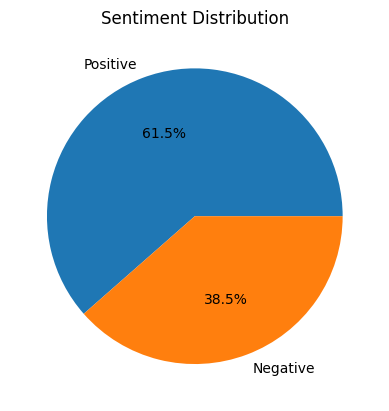

In [ ]:
import matplotlib.pyplot as plt

# Get the count of sentiment values
sentiment_count = new_df['sentiment'].value_counts()


# Convert the count to percentages
sentiment_pct = sentiment_count / len(new_df) * 100

# Create a pie chart with the sentiment percentages
plt.pie(sentiment_pct, labels=sentiment_pct.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

#Diving into key words related US economic conditions

##Recession: Sentiment analysis

In [ ]:
# Create a boolean mask for comments containing the keywords 'recession' or 'recessionary'
mask = new_df['MsgBody'].str.contains('recession|recessionary', case=False)

# Apply the mask to extract the comments with the keywords
recession_comments = new_df.loc[mask, 'MsgBody']
recession_sentiments = new_df.loc[mask, 'sentiment']

# Print the comments and sentiments
for comment, sentiment in zip(recession_comments, recession_sentiments):
    print(f"Comment: {comment}\nSentiment: {sentiment}\n")

Comment: Im not convinced its a trade-off that needs to happen. There are other avenues to controlling inflation but we have too many free market fundamentalists in powerful positions to even talk about basic regulation let alone price controls wealth taxation etc.  As long as the Fed has a mandate to maximize employment they should be pressuring Congress to fix it with legislation rather than letting a goon like Powell make the call.  I think people need to think about the effect this has on other countries too particularly poor nations. On a domestic front it can cause a recession but internationally these economic pressures from our monetary policy can cause wars and conflict. Im not seeing a lot of coverage on that angle unfortunately.
Sentiment: Negative

Comment: You don’t know what consistent value means. The US has not lost 96% of its purchasing power the purchasing power of 1 dollar has decreased by 96%. Those do not mean the same thing. Households work they earn an inflation 

In [ ]:
# Compute the count of positive and negative sentiment for the recession comments
positive_count = (recession_sentiments == 'Positive').sum()
negative_count = (recession_sentiments == 'Negative').sum()

# Print the counts
print(f"Positive: {positive_count}")
print(f"Negative: {negative_count}")

Positive: 70
Negative: 135


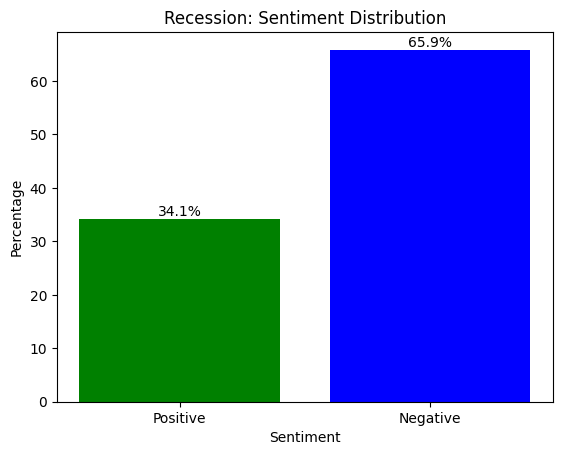

In [ ]:
# Compute the percentage of positive and negative sentiment
total_count = positive_count + negative_count
positive_pct = 100 * positive_count / total_count
negative_pct = 100 * negative_count / total_count

# Create a bar graph
labels = ['Positive', 'Negative']
sizes = [positive_pct, negative_pct]
colors = ['green', 'blue']
plt.bar(labels, sizes, color=colors)
plt.title('Recession: Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')

# Add the percentage numbers to the bars
for i, size in enumerate(sizes):
    plt.text(i, size, f"{size:.1f}%", ha='center', va='bottom')

# Show the plot
plt.show()

## layoff: Sentiment analysis

In [ ]:
# Create a boolean mask for comments containing the keywords 'recession', 'recessionary', 'layoff', 'laid ', 'tech', 'fired', or 'job cuts'
mask = new_df['MsgBody'].str.contains('layoff|laid |tech|fired|job cuts', case=False)

# Apply the mask to extract the comments with the keywords
layoff_comments = new_df.loc[mask, 'MsgBody']
layoff_sentiments = new_df.loc[mask, 'sentiment']

# Print the comments and sentiments
for comment, sentiment in zip(layoff_comments, layoff_sentiments):
    print(f"Comment: {comment}\nSentiment: {sentiment}\n")


Comment: Apparently you didn’t pay attention to the why of businesses moving to Asia. By the agreements Obama signed when American products were imported into China they were taxed heavily. When Chinese imports came into the US they could not be taxed. It was cheaper to build and sell over there or import to the states than to build here and export it. Trump ended that and taxed any ‘American’ company that produced overseas and imported into the country. But Biden just told American companies again that if they were successful we were going to tax them heavily so I expect more to move back there again.   And I never said Mexico would ask China to come in. Did Iraq ask America to come in and destroy their country because of Saddam Husain? No we just went in to ‘liberate’ the people. My question was what if China did the same thing here. Would we accept it? Then why do we do it around the world?   Think about it except for Pearl Harbor when was America ever attacked on its home soil by a

In [ ]:
# Compute the count of positive and negative sentiment for the recession comments
positive_count = (layoff_sentiments == 'Positive').sum()
negative_count = (layoff_sentiments == 'Negative').sum()

# Print the counts
print(f"Positive: {positive_count}")
print(f"Negative: {negative_count}")

Positive: 315
Negative: 238


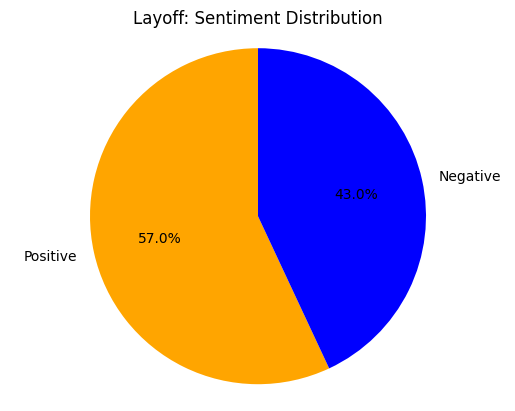

In [ ]:
# Compute the percentage of positive and negative sentiment
total_count = positive_count + negative_count
positive_pct = 100 * positive_count / total_count
negative_pct = 100 * negative_count / total_count

# Create a pie chart
labels = ['Positive', 'Negative']
sizes = [positive_pct, negative_pct]
colors = ['orange', 'blue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Layoff: Sentiment Distribution')

plt.axis('equal')

# Show the plot
plt.show()

#Inflation: Sentiment distribution

In [ ]:
# Create a boolean mask for comments containing the keyword 'inflation'
mask = new_df['MsgBody'].str.contains('inflation', case=False)

# Apply the mask to extract the comments with the keyword
inflation_comments = new_df.loc[mask, 'MsgBody']
inflation_sentiments = new_df.loc[mask, 'sentiment']

# Print the comments and sentiments
for comment, sentiment in zip(inflation_comments, inflation_sentiments):
    print(f"Comment: {comment}\nSentiment: {sentiment}\n")


Comment: The economy is not as strong as it seems and QE/ZIRP are not the only reasons for inflation. While shipping costs have (mostly) stabilized shipping insurance storage costs and lead times around the world are still through the roof. While I agree that real rates need to be positive Im not sure that high inflation is the worst outcome in this situation. The American economy can survive a few more years of 6% inflation but another banking collapse? We dont know what that looks like in 2023.
Sentiment: Negative

Comment: That’s a trade off: there is currently high inflation and very high employment so the idea is that by raising interest rates they will lower economic growth and employment to decrease inflation.
Sentiment: Negative

Comment: The federal reserve can only do so much.  Throwing money around causes inflation so they need to increase interest rates to decrease inflation it’s as simple as that.
Sentiment: Negative

Comment: Im not convinced its a trade-off that needs to

In [ ]:
# Compute the count of positive and negative sentiment for the recession comments
positive_count = (inflation_sentiments == 'Positive').sum()
negative_count = (inflation_sentiments == 'Negative').sum()

# Print the counts
print(f"Positive: {positive_count}")
print(f"Negative: {negative_count}")

Positive: 417
Negative: 370


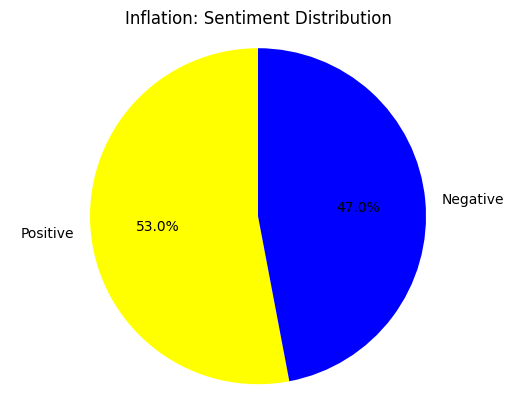

In [ ]:
# Compute the percentage of positive and negative sentiment
total_count = positive_count + negative_count
positive_pct = 100 * positive_count / total_count
negative_pct = 100 * negative_count / total_count

# Create a pie chart
labels = ['Positive', 'Negative']
sizes = [positive_pct, negative_pct]
colors = ['yellow', 'blue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Inflation: Sentiment Distribution')

plt.axis('equal')

# Show the plot
plt.show()

# US Economy: sentiment dsitrubtion

In [ ]:
# Create a boolean mask for comments containing the keywords 'US economy', 'american economy', or 'united states economy'
mask = new_df['MsgBody'].str.contains('Unemployment', case=False)

# Apply the mask to extract the comments with the keyword
unemployment_comments = new_df.loc[mask, 'MsgBody']
unemployment_sentiments = new_df.loc[mask, 'sentiment']

# Print the comments and sentiments
for comment, sentiment in zip(unemployment_comments, unemployment_sentiments):
    print(f"Comment: {comment}\nSentiment: {sentiment}\n")

Comment: Why don’t you use that computer in front of you to look up the facts?   The minimum wage in Texas IS $7.25/hr. Prove me wrong.   The average actual pay in Texas is $25.35/hour. Prove me wrong.   The average wages in Texas have gone up by almost 10X in 40 years. The average apartment rent has gone up 6.5X.   And if you are paying that much you need to find a new job. The only time we ever paid that much was when we owned our own company and had to take out individual insurance. ($1825/month for our family if 3 in 2013) Right now I’m 60. My insurance (BC/BS Silver plan) through my job is $3300 per year. Next year for the first time besides the stimulus checks I will take government benefits and get my insurance for $29/month (yes $29/month for BC/BS Silver plan including dental). I have never taken government benefits including unemployment benefits in my life so far.
Sentiment: Positive

Comment: Please PLEASE find me the quote where powell admits to WANTING and TARGETTING unem

Positive: 126
Negative: 174


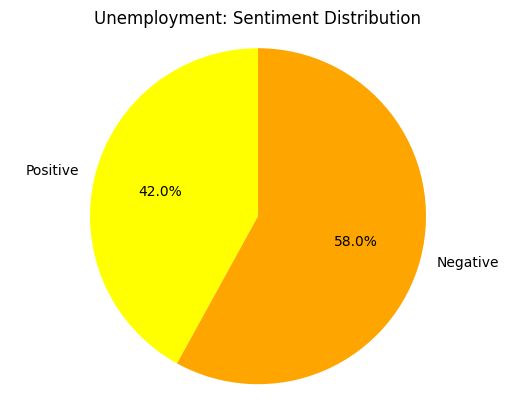

In [ ]:
# Compute the count of positive and negative sentiment for the recession comments
positive_count = (unemployment_sentiments == 'Positive').sum()
negative_count = (unemployment_sentiments == 'Negative').sum()

# Print the counts
print(f"Positive: {positive_count}")
print(f"Negative: {negative_count}")
# Compute the percentage of positive and negative sentiment
total_count = positive_count + negative_count
positive_pct = 100 * positive_count / total_count
negative_pct = 100 * negative_count / total_count

# Create a pie chart
labels = ['Positive', 'Negative']
sizes = [positive_pct, negative_pct]
colors = ['yellow', 'orange']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Unemployment: Sentiment Distribution')

plt.axis('equal')

# Show the plot
plt.show()

In [ ]:
new_df.to_csv('/content/drive/MyDrive/reddit data/final_economic_sentiment.csv', index=False)
